## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
data=pd.read_excel("Crude Oil Prices Daily.xlsx")

In [3]:
data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [4]:
data.tail()

,Date,Closing Value
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78
8222,2018-07-09,73.93


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


In [6]:
data.describe()

,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


## Data Preprocessing

In [7]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [8]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [9]:
data.dropna(axis=0,inplace=True)

In [10]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [11]:
data_oil=data.reset_index()['Closing Value']

In [12]:
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

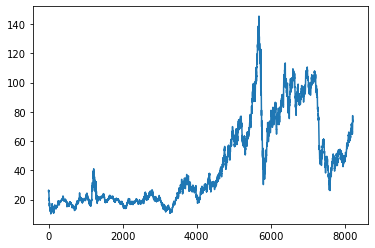

In [13]:
plt.plot(data_oil)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [15]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [16]:
train_data

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.37916482],
       [0.38153413],
       [0.38294092]])

In [17]:
test_data

array([[0.38005331],
       [0.36872501],
       [0.37324152],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

In [18]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [19]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [21]:
y_train

array([0.10165852, 0.09906708, 0.08203761, ..., 0.37879461, 0.37916482,
       0.38153413])

In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
X_train

array([[[0.11335703],
        [0.11661484],
        [0.12053902],
        ...,
        [0.10980305],
        [0.1089886 ],
        [0.11054346]],

       [[0.11661484],
        [0.12053902],
        [0.11550422],
        ...,
        [0.1089886 ],
        [0.11054346],
        [0.10165852]],

       [[0.12053902],
        [0.11550422],
        [0.1156523 ],
        ...,
        [0.11054346],
        [0.10165852],
        [0.09906708]],

       ...,

       [[0.36731823],
        [0.35176958],
        [0.36080261],
        ...,
        [0.36391234],
        [0.37042796],
        [0.37042796]],

       [[0.35176958],
        [0.36080261],
        [0.35354657],
        ...,
        [0.37042796],
        [0.37042796],
        [0.37879461]],

       [[0.36080261],
        [0.35354657],
        [0.35295424],
        ...,
        [0.37042796],
        [0.37879461],
        [0.37916482]]])

## Model Evaluation

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM 

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 17s 66ms/step - loss: 0.0017 - val_loss: 9.7563e-04
Epoch 2/50
84/84 [==============================] - 1s 16ms/step - loss: 1.3234e-04 - val_loss: 7.4292e-04
Epoch 3/50
84/84 [==============================] - 1s 17ms/step - loss: 1.2154e-04 - val_loss: 7.4815e-04
Epoch 4/50
84/84 [==============================] - 2s 21ms/step - loss: 1.2413e-04 - val_loss: 9.9048e-04
Epoch 5/50
84/84 [==============================] - 2s 20ms/step - loss: 1.2953e-04 - val_loss: 9.1363e-04
Epoch 6/50
84/84 [==============================] - 2s 20ms/step - loss: 1.2265e-04 - val_loss: 7.2222e-04
Epoch 7/50
84/84 [==============================] - 1s 17ms/step - loss: 1.2133e-04 - val_loss: 0.0011
Epoch 8/50
84/84 [==============================] - 2s 18ms/step - loss: 1.2029e-04 - val_loss: 0.0010
Epoch 9/50
84/84 [==============================] - 2s 19ms/step - loss: 1.1979e-04 - val_loss: 6.7324e-04
Epoch 10/50
84/84 [=============================

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [41]:
model.save("crude_oil.h5")

In [29]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## Model Evaluation

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

29.229106304622622

In [31]:
math.sqrt(mean_squared_error(ytest,test_predict))

78.33189244270302

### Plot

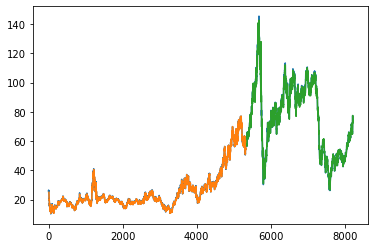

In [32]:

look_back=10
trainPredictPlot = np.empty_like(data_oil)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(data_oil)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_oil)-1, :] = test_predict
plt.plot(scaler.inverse_transform(data_oil))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Predict the future 10 days and plot the graph

In [34]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:

from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<10):
    
    if(len(temp_input)>10):

        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.4711648]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.47116479]
1 day output [[0.4710071]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.47116479 0.47100711]
2 day output [[0.47043177]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.47116479 0.47100711 0.47043177]
3 day output [[0.46935746]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.47116479 0.47100711 0.47043177 0.46935746]
4 day output [[0.46821904]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.47116479
 0.47100711 0.47043177 0.46935746 0.46821904]
5 day output [[0.46706894]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.47116479 0.47100711
 0.47043177 0.46935746 0.46821904 0.46706894]
6 day output [[0.4659978]]
7 day input [0.46497853 0.47038353 0.47149415 0.47116479 0.47100711 0

In [37]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

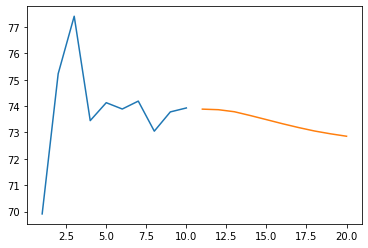

In [38]:
plt.plot(day_new,scaler.inverse_transform(data_oil[8206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

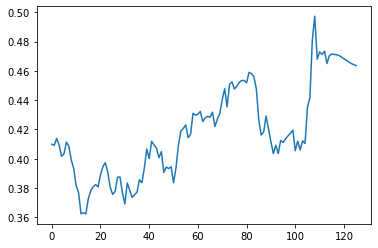

In [39]:
df3=data_oil.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

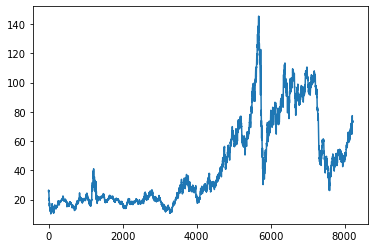

In [40]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)